In [3]:
# impoting the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [4]:
# using minmax_scale to standardize the features in data set
# confusion matrix for evaluation

from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix

In [5]:
# Using GridSearchCV for determining optimal parameters 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [6]:
dataset = pd.read_csv('Dentistry Dataset.csv')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

In [8]:
dataset.head(10)

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
5,6,NaN,25,Female,24.40,24.42,6.20,6.20,6.23,6.23,0.254,0.254,0.255,0.255
6,7,NaN,21,Female,28.10,28.12,6.48,6.48,6.84,6.84,0.230,0.230,0.243,0.243
7,8,NaN,18,Female,24.24,24.23,6.15,6.15,6.18,6.15,0.253,0.252,0.254,0.253
8,9,NaN,18,Female,25.95,25.95,6.74,6.78,6.74,6.74,0.259,0.261,0.259,0.259
9,10,NaN,25,Female,23.81,23.81,6.24,6.24,6.26,6.25,0.262,0.262,0.262,0.262


In [9]:
# Performing Data Pre-Processing

dataset.isnull().sum()

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [11]:
# Statistical analysis to understand mean, standard deviation and other parameters.

dataset.describe()

,Sl No,Sample ID,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,0.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,550.500000,NaN,21.625455,25.989009,25.880082,6.563000,6.564491,6.669627,6.675018,0.253122,0.252355,0.256453,0.256361
std,317.686953,NaN,2.085892,1.315292,1.862323,0.379035,0.377553,0.375841,0.377098,0.015344,0.012892,0.012355,0.012374
min,1.000000,NaN,18.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,275.750000,NaN,20.000000,25.000000,24.980000,6.290000,6.300000,6.400000,6.407500,0.242000,0.242000,0.247000,0.247000
50%,550.500000,NaN,22.000000,25.900000,25.900000,6.520000,6.520000,6.660000,6.680000,0.253000,0.253000,0.255000,0.255000
75%,825.250000,NaN,23.000000,26.992500,27.000000,6.802500,6.802500,6.910000,6.920000,0.262000,0.261250,0.264250,0.264000
max,1100.000000,NaN,25.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


In [1]:
# Visualizing different canine distances across values using linechart and palette colors


<Axes: xlabel='inter canine distance intraoral', ylabel='intercanine distance casts'>

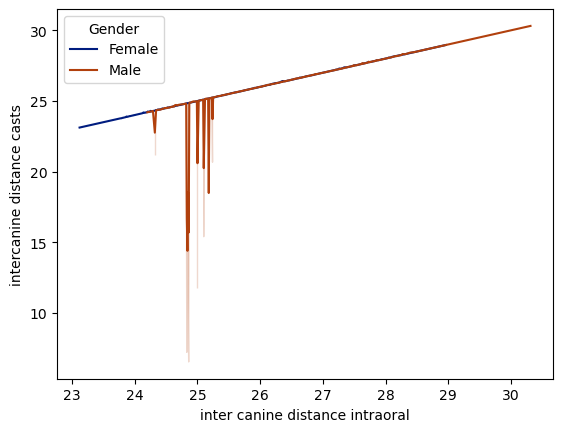

In [13]:
# Plotting between inter canine distance intraoral and intercanine distance casts
sns.lineplot(x='inter canine distance intraoral', y='intercanine distance casts', hue='Gender', data=dataset, palette='dark')

<Axes: xlabel='right canine width intraoral', ylabel='right canine width casts'>

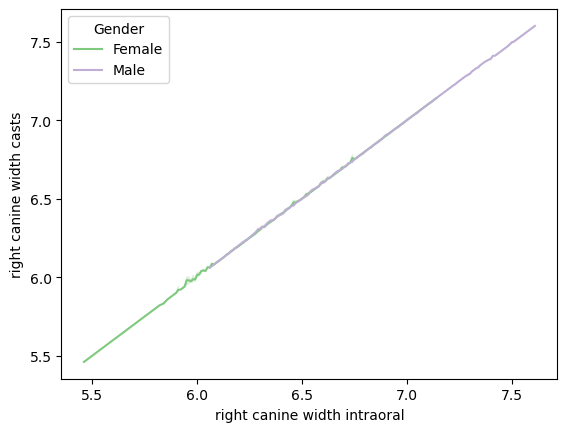

In [16]:
# Plotting between right canine width intraoral and right canine width casts
sns.lineplot(x='right canine width intraoral', y='right canine width casts', hue='Gender', data=dataset, palette = 'Accent')

<Axes: xlabel='left canine width intraoral', ylabel='left canine width casts'>

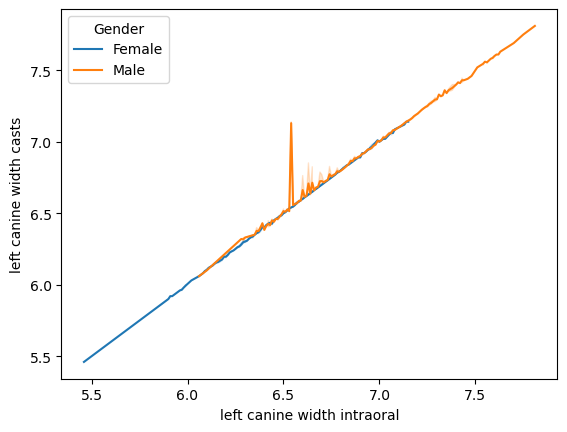

In [17]:
# Plotting between left canine width intraoral and left canine width casts
sns.lineplot(x='left canine width intraoral', y='left canine width casts', hue='Gender', data=dataset, palette = 'tab10')

<Axes: xlabel='right canine index intra oral', ylabel='right canine index casts'>

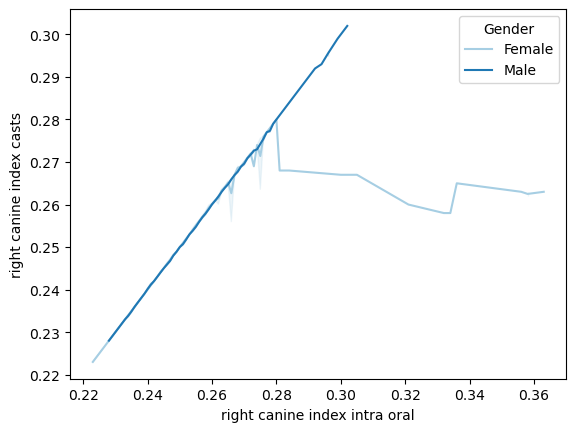

In [19]:
# Plotting between right canine index intraoral and right canine index casts
sns.lineplot(x='right canine index intra oral', y='right canine index casts', hue='Gender', data=dataset, palette = 'Paired')

<Axes: xlabel='left canine index intraoral', ylabel='left canine index casts'>

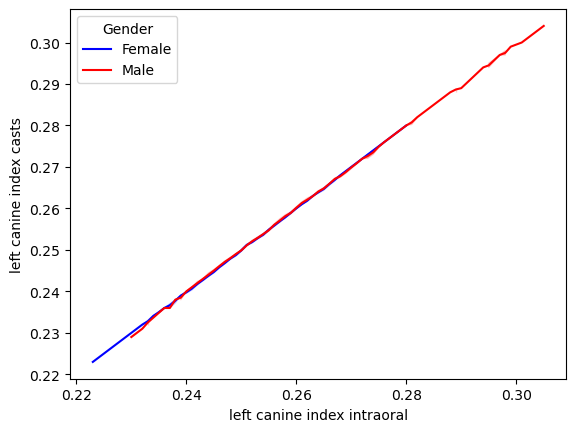

In [20]:
# Plotting between left canine index intraoral and left canine index casts
sns.lineplot(x='left canine index intraoral', y='left canine index casts', hue='Gender', data=dataset, palette = ['blue', 'red'])

In [ ]:
# Encoding Categorical data

In [22]:
# Encoding the gender feature from categorical to numerical
gender_encoded = {'Female':0, 'Male':1}
dataset['Gender'] = dataset['Gender'].map(gender_encoded)

In [25]:
dataset.head(10)

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
5,6,NaN,25,0,24.40,24.42,6.20,6.20,6.23,6.23,0.254,0.254,0.255,0.255
6,7,NaN,21,0,28.10,28.12,6.48,6.48,6.84,6.84,0.230,0.230,0.243,0.243
7,8,NaN,18,0,24.24,24.23,6.15,6.15,6.18,6.15,0.253,0.252,0.254,0.253
8,9,NaN,18,0,25.95,25.95,6.74,6.78,6.74,6.74,0.259,0.261,0.259,0.259
9,10,NaN,25,0,23.81,23.81,6.24,6.24,6.26,6.25,0.262,0.262,0.262,0.262


In [ ]:
# Splitting the data into dependent and independent data

In [26]:
# Dropping the dependent variables from the dataset
X = dataset.drop(['Gender','Sample ID'], axis=1)

In [27]:
# Y is dependent output variable
y = dataset['Gender']

In [28]:
X

,Sl No,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,24,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,22,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,23,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,20,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,20,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,24,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,1097,22,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,1098,25,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,1099,21,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


In [29]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1095    1
1096    1
1097    1
1098    1
1099    1
Name: Gender, Length: 1100, dtype: int64

In [30]:
# Splitting data into test and train datasets       
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(880, 12)
(220, 12)
(880,)
(220,)


In [ ]:
# Loading different models

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


Accuracy of Logistic Regression is: 92.27%
Confusion Matrix:
 [[107   6]
 [ 11  96]]
AUC of Logistic Regression is: 0.96


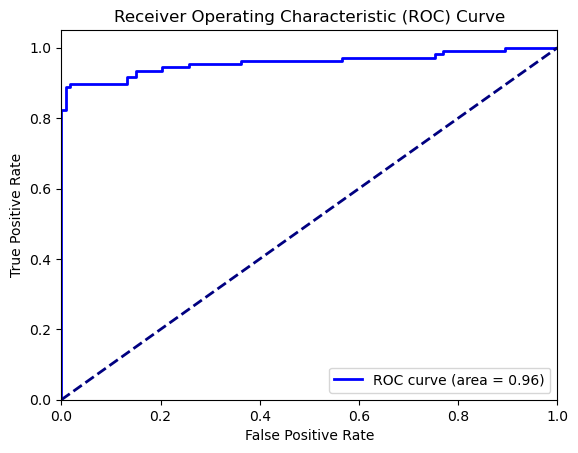

In [37]:
# Logistic Regression with confusion matrix, roc curve, auc curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Logistic regression
logistic_regression = LogisticRegression(random_state=0, max_iter=10000)
logistic_regression.fit(X_train, y_train)
logistic_regression_pred = logistic_regression.predict(X_test)
logistic_regression_acc = accuracy_score(y_test, logistic_regression_pred)
print('Accuracy of Logistic Regression is: {:.2f}%'.format(logistic_regression_acc * 100))

# Confusion Matrix
cm = confusion_matrix(y_test, logistic_regression_pred)
print('Confusion Matrix:\n', cm)

# ROC Curve and AUC
logistic_regression_prob = logistic_regression.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, logistic_regression_prob)
roc_auc = roc_auc_score(y_test, logistic_regression_prob)
print('AUC of Logistic Regression is: {:.2f}'.format(roc_auc))

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy of Decision Tree is: 100.00%
Confusion Matrix:
 [[113   0]
 [  0 107]]
AUC of Decision Tree is: 1.00


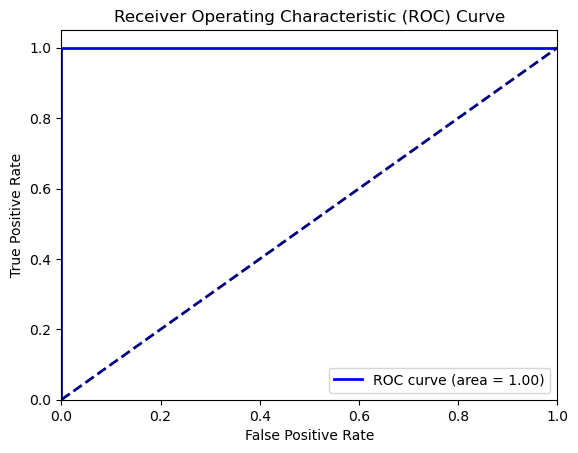

In [38]:
# Decision Tree Classifier with confusion matrix, roc curve, auc curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
decision_tree_acc = accuracy_score(y_test, y_pred)
print('Accuracy of Decision Tree is: {:.2f}%'.format(decision_tree_acc * 100))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# ROC Curve and AUC
decision_tree_prob = decision_tree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, decision_tree_prob)
roc_auc = roc_auc_score(y_test, decision_tree_prob)
print('AUC of Decision Tree is: {:.2f}'.format(roc_auc))

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy of Random Forest is: 99.09%
Confusion Matrix:
 [[112   1]
 [  1 106]]
AUC of Random Forest is: 1.00


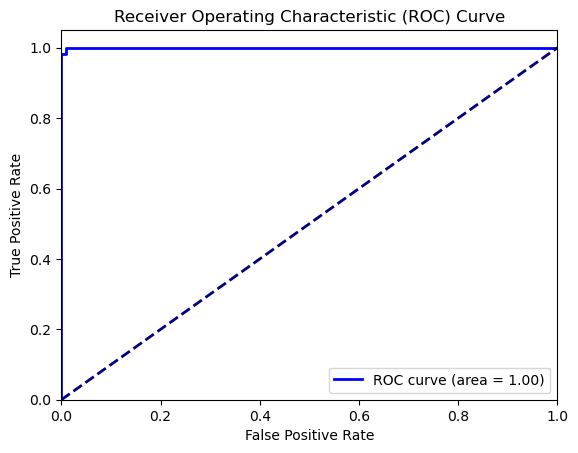

In [39]:
# Random Forest Classifier with confusion matrix, roc curve, auc curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)
random_forest_acc = accuracy_score(y_test, random_forest_pred)
print('Accuracy of Random Forest is: {:.2f}%'.format(random_forest_acc * 100))

# Confusion Matrix
cm = confusion_matrix(y_test, random_forest_pred)
print('Confusion Matrix:\n', cm)

# ROC Curve and AUC
random_forest_prob = random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, random_forest_prob)
roc_auc = roc_auc_score(y_test, random_forest_prob)
print('AUC of Random Forest is: {:.2f}'.format(roc_auc))

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy of Gradient Boosting Classifier is: 100.00%
Confusion Matrix:
 [[113   0]
 [  0 107]]
AUC of Gradient Boosting Classifier is: 1.00


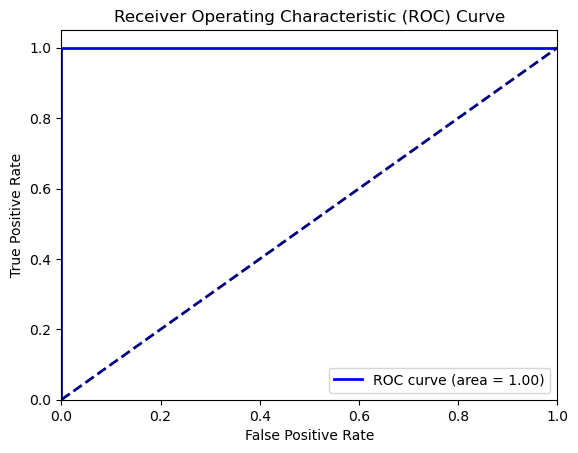

In [40]:
# Gradient Boosting Classifier with confusion matrix, roc curve, auc curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Gradient Boosting Classifier
gradient_boost = GradientBoostingClassifier(random_state=0)
gradient_boost.fit(X_train, y_train)
gradient_boost_pred = gradient_boost.predict(X_test)
gradient_boost_acc = accuracy_score(y_test, gradient_boost_pred)
print('Accuracy of Gradient Boosting Classifier is: {:.2f}%'.format(gradient_boost_acc * 100))

# Confusion Matrix
cm = confusion_matrix(y_test, gradient_boost_pred)
print('Confusion Matrix:\n', cm)

# ROC Curve and AUC
gradient_boost_prob = gradient_boost.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, gradient_boost_prob)
roc_auc = roc_auc_score(y_test, gradient_boost_prob)
print('AUC of Gradient Boosting Classifier is: {:.2f}'.format(roc_auc))

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()